# Data Collection

In [2]:
import csv
from docx import Document

def read_table_from_docx(docx_file_path):
    """
    Extracts only table from DOCX file and returns its data
    """
    document = Document(docx_file_path)
    table = document.tables[0]
    table_data = []
    for row in table.rows:
            row_data = [cell.text.replace('\xa0', '').rstrip() for cell in row.cells]
            table_data.append(row_data)
    return table_data

def save_table_to_csv(table_data, csv_file_path):
    """
    Saves table data to a CSV file.
    """
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerows(table_data)

In [7]:
import os

docx_file_path = '..\data_raw\Assignment 1.docx'
csv_file_path = '..\data_raw\data_raw.csv'

# Check if CSV file already exists
if (not os.path.isfile(csv_file_path)):
    # Extract table from DOCX file and save to CSV
    table = read_table_from_docx(docx_file_path)
    save_table_to_csv(table, csv_file_path)

In [8]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv(csv_file_path)
print(data)

   Height  Weight  Age  Grip strength Frailty
0    65.8     112   30             30       N
1    71.5     136   19             31       N
2    69.4     153   45             29       N
3    68.2     142   22             28       Y
4    67.8     144   29             24       Y
5    68.7     123   50             26       N
6    69.8     141   51             22       Y
7    70.1     136   23             20       Y
8    67.9     112   17             19       N
9    66.8     120   39             31       N


# Data Proccessing

One-hot encode categorical variable, Frailty

In [5]:
data_encoded = data.copy()
data_encoded['Frailty'] = data_encoded['Frailty'].apply(lambda x: 0 if x == 'N' else 1 if x == 'Y' else x)
print(data_encoded)

   Height  Weight  Age  Grip strength  Frailty
0    65.8     112   30             30        0
1    71.5     136   19             31        0
2    69.4     153   45             29        0
3    68.2     142   22             28        1
4    67.8     144   29             24        1
5    68.7     123   50             26        0
6    69.8     141   51             22        1
7    70.1     136   23             20        1
8    67.9     112   17             19        0
9    66.8     120   39             31        0


Check for missing values

In [9]:
data_encoded.isna().sum()

Height           0
Weight           0
Age              0
Grip strength    0
Frailty          0
dtype: int64

If there were missing values:

In [10]:
data_no_na = data_encoded.dropna()
# or
data_replaced_na = data_encoded.fillna(data_encoded.mean())
# or some other method to fill missing values

Save cleaned data

In [12]:
data_no_na.to_csv('../data_clean/data_clean.csv', index=False)

# Data Analysis

Exploratory Data Analysis

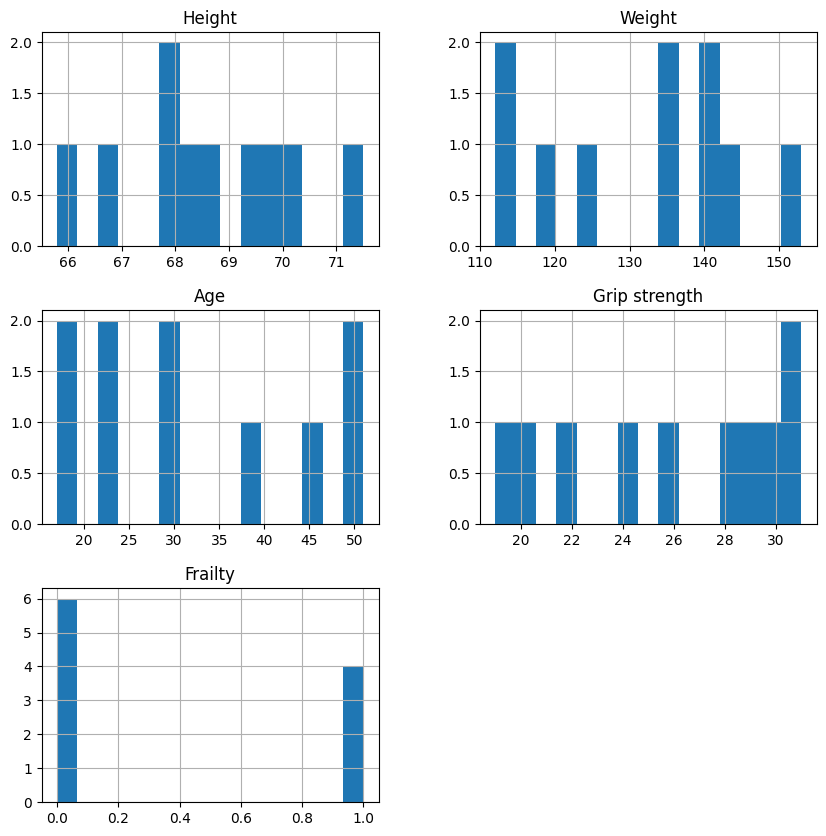

In [31]:
import matplotlib.pyplot as plt
data_no_na.hist(bins=15, figsize=(10, 10))
plt.savefig('../results/distribution.png')

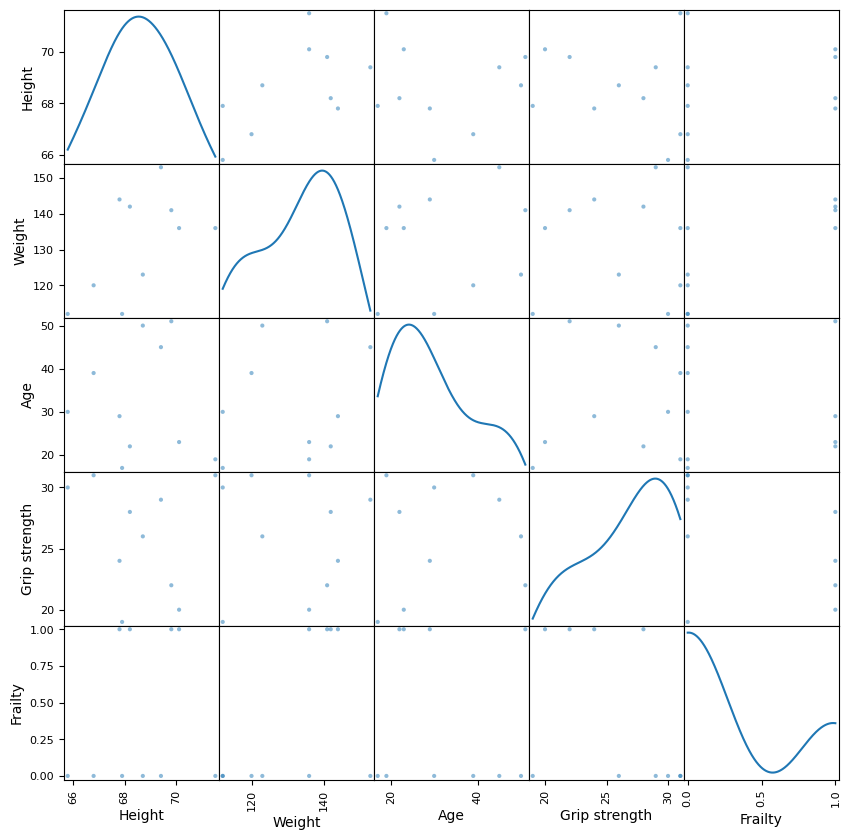

In [35]:
pd.plotting.scatter_matrix(data_no_na, figsize=(10, 10), diagonal='kde')
plt.savefig('../results/scatter_matrix.png')

During this phase we would build a model as well if there was a significant relationship between the independent and dependent variables, which there does seem to be

In [21]:
from scipy.stats import ttest_ind

t_scores = pd.DataFrame(columns=['Variable', 'T-Statistic', 'P-Value'])

# Perform t-test on variables of data_no_na
for column_name in data_no_na:
    if column_name != 'Frailty':
        variable = data_no_na[column_name]
        target = data_no_na['Frailty']
        t_statistic, p_value = ttest_ind(variable, target)
        t_scores.loc[len(t_scores.index)] = [column_name, t_statistic, p_value]

# save results
t_scores.to_csv('../results/results.txt', index=False)